1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
%config InlineBackend.figure_format = "retina"  
plt.rcParams["figure.figsize"] = (12, 3)

In [3]:
bmv = pd.read_csv("../files/lec02/ipc0019.csv")

In [4]:
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])

In [5]:
cemex_close = bmv["CEMEXCPO MF Equity"]["PX_LAST"]

In [6]:
date_index = pd.to_datetime(cemex_close.index)

In [7]:
cemex_close.index = date_index

In [8]:
type(cemex_close.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
cemex_diff = cemex_close- cemex_close.shift()
cemex_diff

date
2000-01-03     NaN
2000-01-04   -0.52
2000-01-05   -0.01
2000-01-06   -0.11
2000-01-07    0.08
              ... 
2019-09-20    0.22
2019-09-23   -0.14
2019-09-24   -0.05
2019-09-25   -0.01
2019-09-26   -0.01
Name: PX_LAST, Length: 4983, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


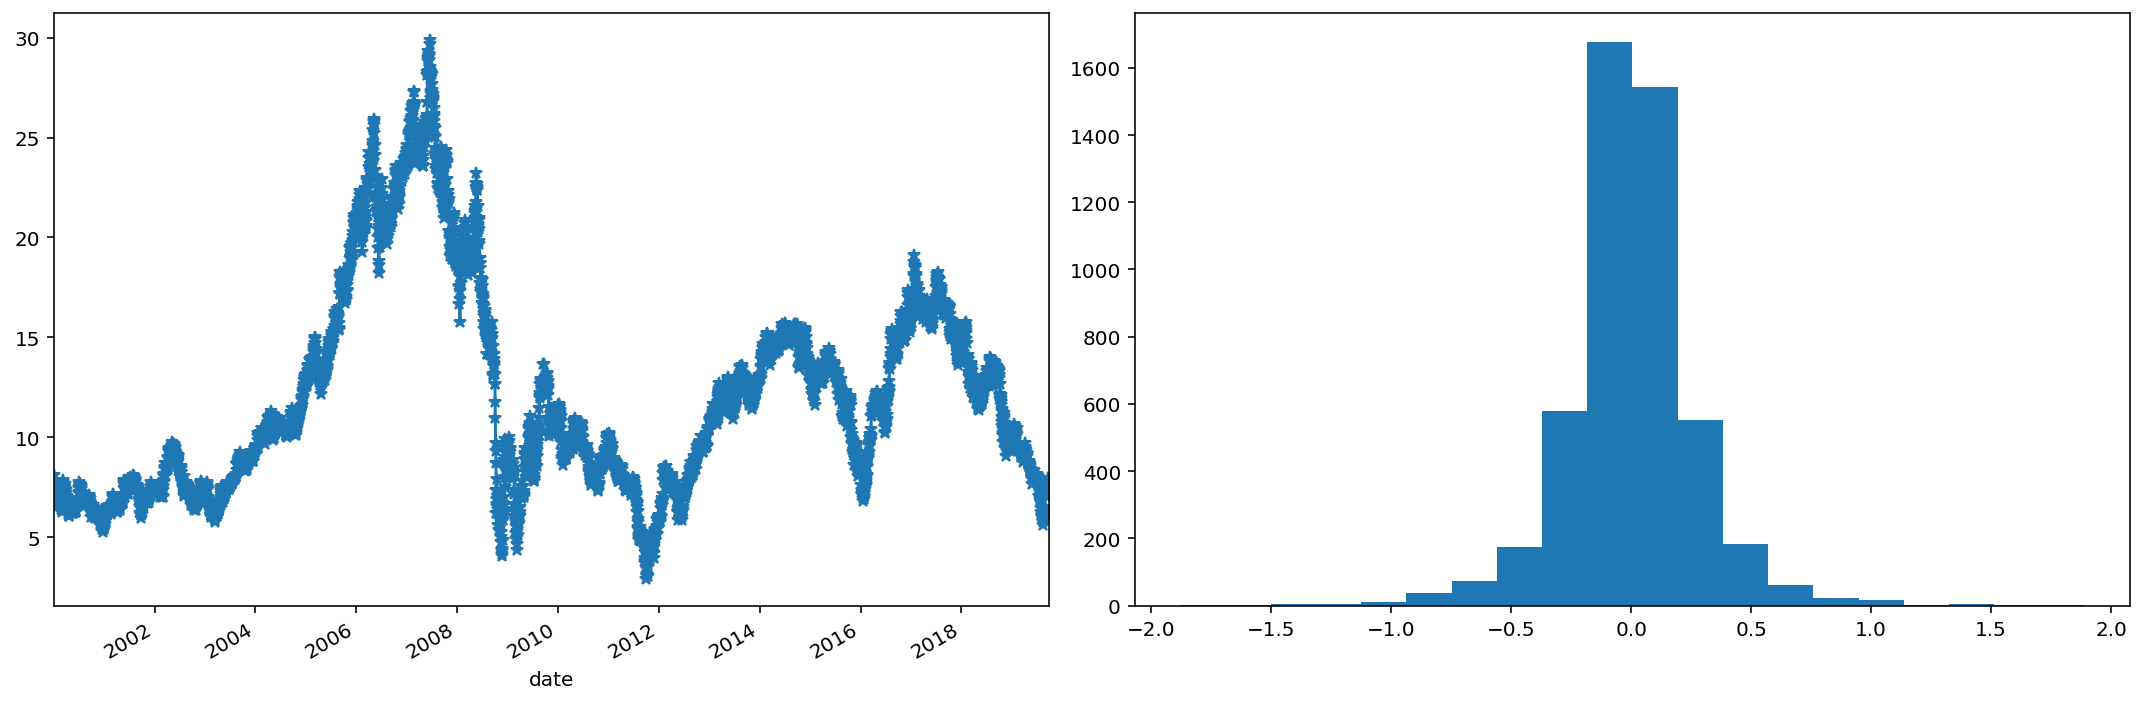

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
cemex_close.plot(ax=ax[0], marker='*')
#cemex_diff.plt.hist(ax=ax[1], bins=20)
ax[1].hist(cemex_diff, bins = 20)
plt.tight_layout();

2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`

In [11]:
estan = cemex_diff.loc[:"2018-06-01"]

In [18]:
cemex_std = estan.resample("Q").std()
cemex_std

date
2000-03-31    0.205321
2000-06-30    0.166436
2000-09-30    0.111046
2000-12-31    0.104560
2001-03-31    0.115343
                ...   
2017-06-30    0.213890
2017-09-30    0.220190
2017-12-31    0.215186
2018-03-31    0.258683
2018-06-30    0.196043
Freq: Q-DEC, Name: PX_LAST, Length: 74, dtype: float64

(array([10.,  6.,  9.,  8.,  9.,  4.,  5.,  5.,  3.,  1.,  2.,  2.,  3.,
         2.,  0.,  1.,  1.,  0.,  0.,  2.]),
 array([0.08835244, 0.11610764, 0.14386284, 0.17161804, 0.19937323,
        0.22712843, 0.25488363, 0.28263883, 0.31039403, 0.33814923,
        0.36590442, 0.39365962, 0.42141482, 0.44917002, 0.47692522,
        0.50468042, 0.53243561, 0.56019081, 0.58794601, 0.61570121,
        0.64345641]),
 <a list of 20 Patch objects>)

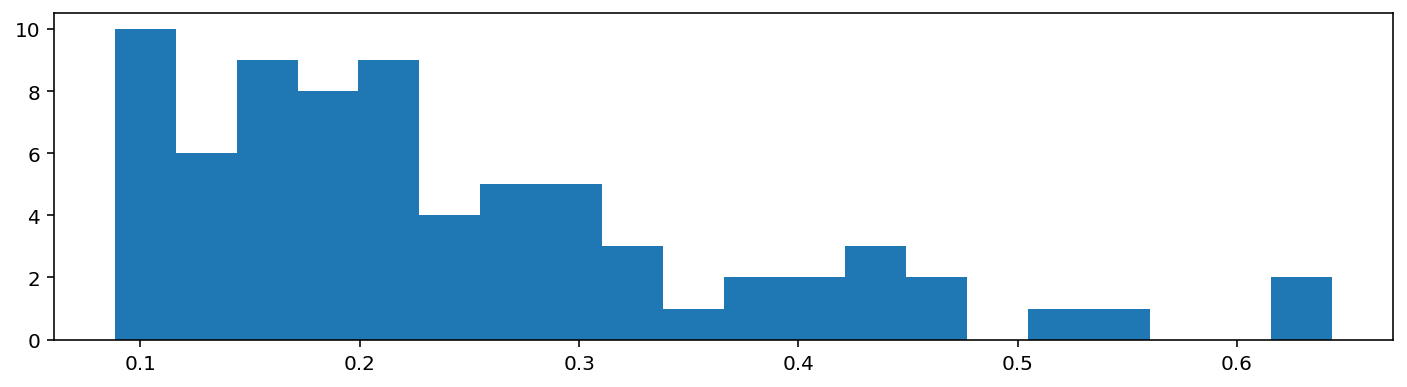

In [19]:
plt.hist(cemex_std[: "2018-06-01"], bins = 20)

3. Realiza nuevamente el ejercicio 2 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?

(array([157., 275., 221., 138.,  67.,  37.,  32.,  12.,  11.,   3.,   1.,
          2.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.01516575, 0.09292763, 0.17068951, 0.24845139, 0.32621327,
        0.40397515, 0.48173703, 0.55949891, 0.63726079, 0.71502267,
        0.79278455, 0.87054643, 0.94830831, 1.02607019, 1.10383207,
        1.18159395, 1.25935583, 1.33711771, 1.41487959, 1.49264147,
        1.57040335]),
 <a list of 20 Patch objects>)

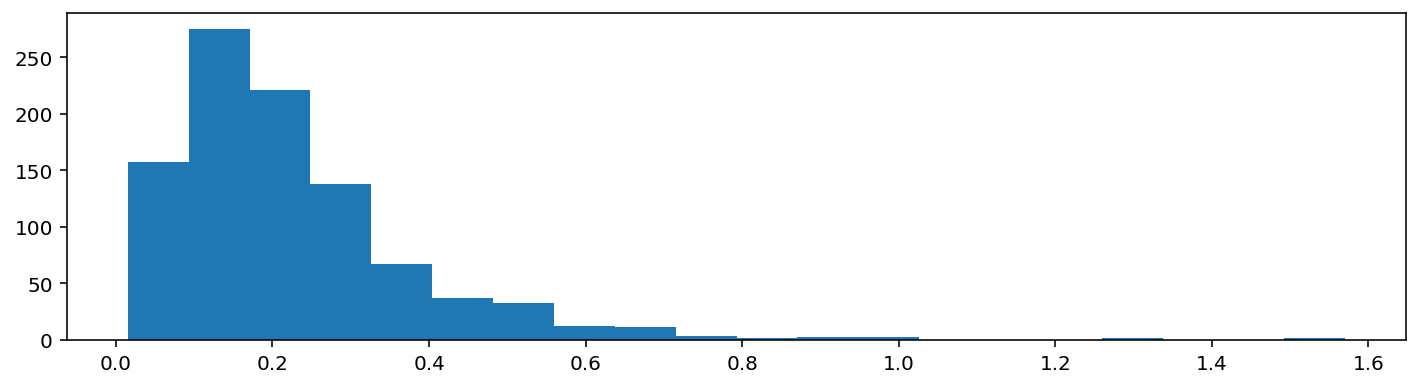

In [15]:
cemex_std = cemex_diff.resample("W").std()
plt.hist(cemex_std[: "2018-06-01"], bins = 20)

Se nota que la desviación estandar se localiza entre cero y 1 por lo en muchos días (mas del 50% de los días) la desviacion estandar se encuentra entre 0 y 0.5

4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?



Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September'],
      dtype='object', length=4983)

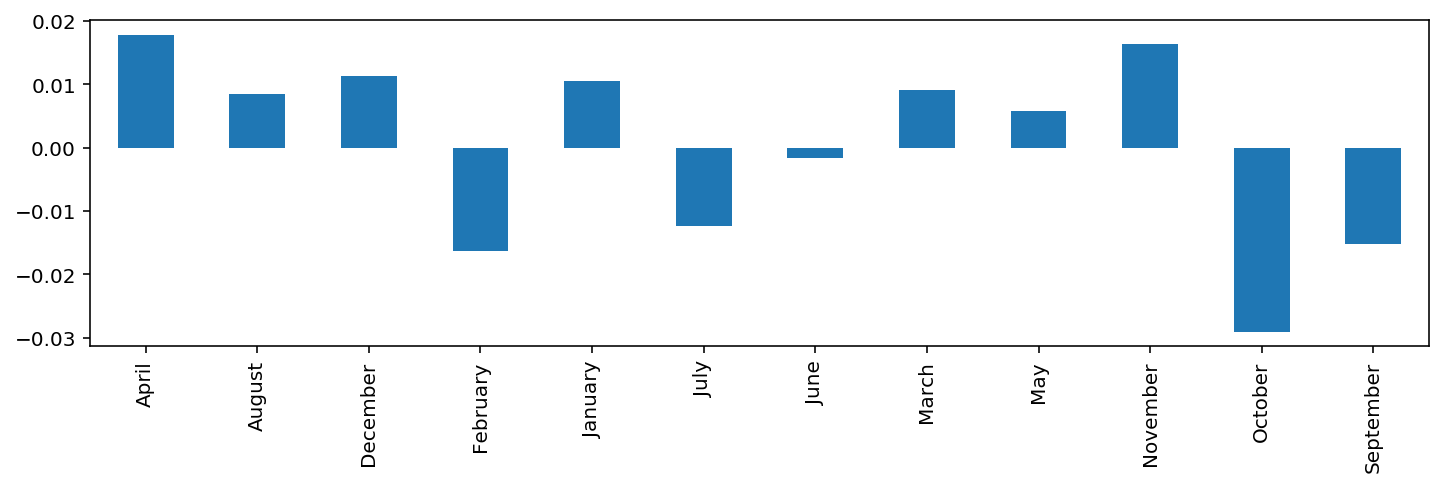

In [16]:
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
months

El promedio de las diferencias por mes, durante los años analizados, nos indica que en los meses de febrero , julio, octubre y septiembre, los precios de la acción estuvienron a la baja, que podría coincidir con los informes trimestrales publicados

5. Realiza nuevamente el ejercicio 4 considerando `cemex_close`. ¿Por qué difieren las gráficas?

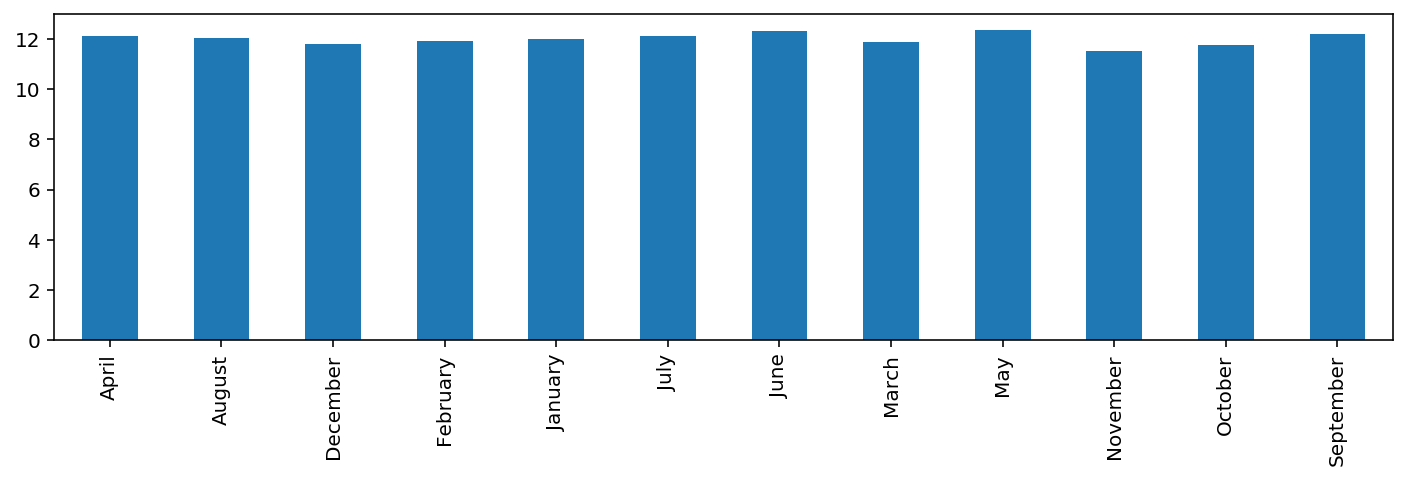

In [17]:
months = cemex_close.index.strftime("%B")
cemex_close.groupby(months).mean().plot(kind="bar")

porque una es con la diferencia y la otra es con el valor, por lo que el valor promedio oscila entre 11 y 13, mientras que la diferencia el valor promedio oscila entra -0.03 y 0.02